<a href="https://colab.research.google.com/github/leopapuma/tarea-10/blob/main/tarea_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

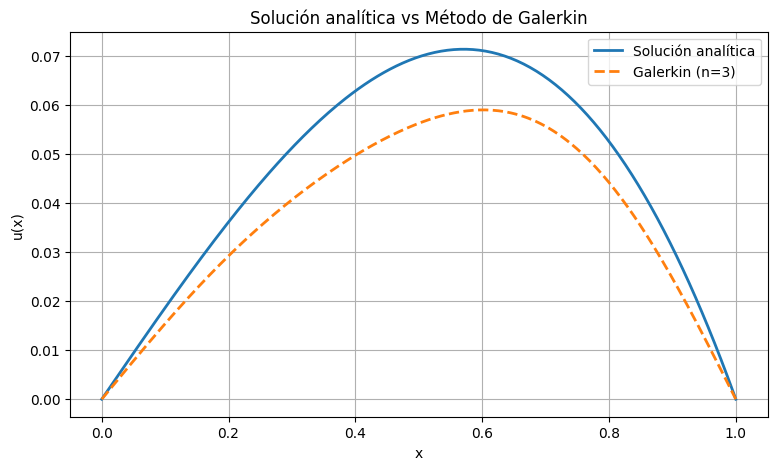

error maximo = 0.013640913142051125
error en norma L2 = 0.009381949165342324


/tmp/ipython-input-2803294332.py:89: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  error_L2 = np.sqrt(np.trapz(error**2, xx))


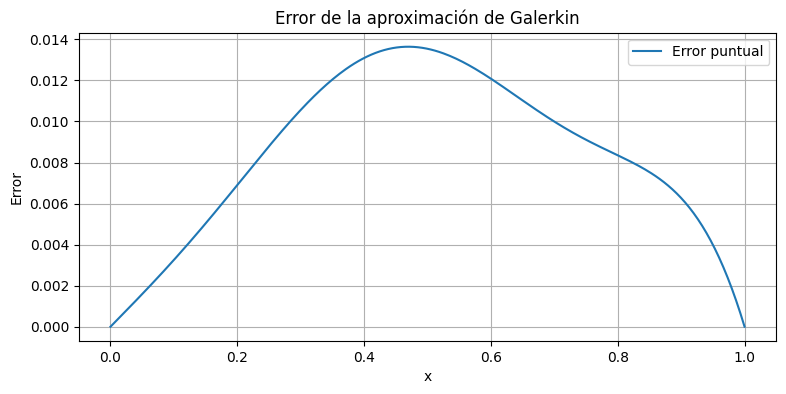

In [2]:
# MÉTODO DE GALERKIN

# Problema:
#   -u''(x) + u(x) - x = 0,   0 < x < 1
#   u(0) = u(1) = 0
# librerias que se van usar para resolver el problema

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#  solucion analitica para resolver el problema pedido


x = sp.symbols('x')
u = sp.Function('u')

# ecuacion diferencial equivlaente es : u'' + u = -x
ode = u(x).diff(x, 2) + u(x) + x

# condiciones de fronteras
sol_exact = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

# esprecion de la solucion
u_exact_expr = sol_exact.rhs

# funcion numerica
u_exact_fn = sp.lambdify(x, u_exact_expr, 'numpy')

#  APROXIMACIÓN POR GALERKIN


# Coeficientes desconocidos
a1, a2, a3 = sp.symbols('a1 a2 a3')

# Funciones base
beta1 = sp.sin(sp.pi*x)
beta2 = sp.sin(2*sp.pi*x)
beta3 = sp.sin(3*sp.pi*x)

# Aproximación de Galerkin
u_g = a1*beta1 + a2*beta2 + a3*beta3

# Residuo del problema R = -u'' + u - x
R = -sp.diff(u_g, x, 2) + u_g - x


# 3. ECUACIONES DE GALERKIN


# Condiciones: integral
eq1 = sp.integrate(R*beta1, (x, 0, 1))
eq2 = sp.integrate(R*beta2, (x, 0, 1))
eq3 = sp.integrate(R*beta3, (x, 0, 1))

# Resolución del sistema
sol_alpha = sp.solve([eq1, eq2, eq3], [a1, a2, a3])

# Sustitución en la solución aproximada
u_g_expr = sp.simplify(u_g.subs(sol_alpha))

# Función numérica de Galerkin
u_g_fn = sp.lambdify(x, u_g_expr, 'numpy')

#conparacion de la grafica

xx = np.linspace(0, 1, 300)

plt.figure(figsize=(9,5))
plt.plot(xx, u_exact_fn(xx), label='Solución analítica', linewidth=2)
plt.plot(xx, u_g_fn(xx), '--', label='Galerkin (n=3)', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solución analítica vs Método de Galerkin')
plt.grid(True)
plt.legend()
plt.show()

# calculamos el error


# error puntual
error = u_exact_fn(xx) - u_g_fn(xx)

# error máximo
error_max = np.max(np.abs(error))

# error en norma L2
error_L2 = np.sqrt(np.trapz(error**2, xx))

print('error maximo =', error_max)
print('error en norma L2 =', error_L2)


# grafica del error


plt.figure(figsize=(9,4))
plt.plot(xx, error, label='Error puntual')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error de la aproximación de Galerkin')
plt.grid(True)
plt.legend()
plt.show()
